                                Logistic Regression(Univariate)

Team-18
Utkarsh Sachan  1MS19IS135
Zaid Ahmad      1MS19IS142
Rishabh Barma   1MS19IS100

In [10]:
import pandas as pd
import numpy as np
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:>

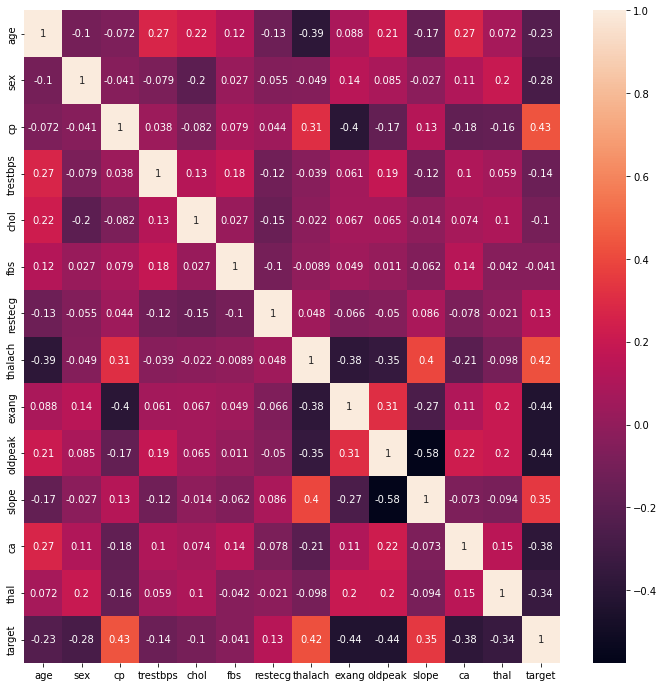

In [11]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
data1=data.drop(['target'],axis=1)
scaled_data = pd.DataFrame(se.fit_transform(data1))
scaled_data.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
corrmat = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data[corrmat.index].corr(),annot=True)

Plotting heatmap for finding the attribute which has maximum correlation

In [5]:
#with the help of the above heatmap we are picking the cp feature 
x=data['cp'].values.reshape(-1,1)
y=data['target'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [6]:
pred=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       143
           1       0.77      0.75      0.76       165

    accuracy                           0.75       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.75      0.75      0.75       308



In [7]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve
conf=confusion_matrix(y_test,pred)
conf

array([[107,  36],
       [ 42, 123]], dtype=int64)

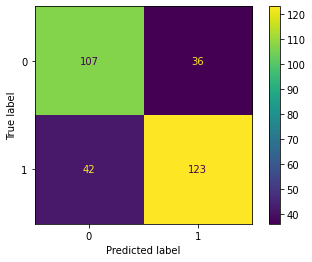

In [8]:
plot_confusion_matrix(model,x_test,y_test)

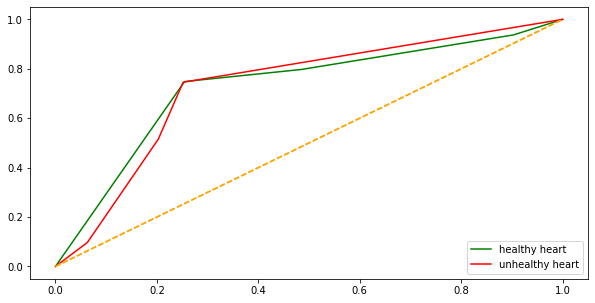

In [9]:
fpr={}
tpr={}
thresh={}
y_proba=model.predict_proba(x_test)
for i in range(2):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,y_proba[:,i],pos_label=i)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fpr[0],tpr[0],linestyle='-',color='green',label='healthy heart')
plt.plot(fpr[1],tpr[1],linestyle='-',color='red',label='unhealthy heart')
plt.plot([[0,0],[1,1]],linestyle='--',color='orange')
plt.legend(loc='lower right')
plt.show()

INFERENCE
           Observing the multivariate logistic regression model and comparing it with the univariate model, it is                clear that all the scores are reduced by an average of 5.8%, thus we come to conclusion that feature "CP" has maximun correlation.